# 2-D Exploratory Data Analysis

In this notebook we will pick ONE variable you're interested in understanding from your non-census data and plot it against various census variables in scatterplots or dotplots.

### Standard Python and R imports

In [16]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [18]:
%%R

# My commonly used R imports

require('tidyverse')

## Load the data

In [19]:
%%R
 
# Import data with R
df <- read_csv('combinedwithcensus.csv', show_col_types = FALSE)
df

# A tibble: 2,542 × 139
   `Unnamed: 0` Borough   Borough/Citywide Off…¹ District School `School Name_x`
          <dbl> <chr>     <chr>                     <dbl> <chr>  <chr>          
 1            0 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 2            1 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 3            2 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 4            3 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 5            4 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 6            5 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 7            6 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 8            7 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 9            8 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
10            9 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
# ℹ 

In [20]:
# Import data in python
mtcars = pd.read_csv('combinedwithcensus.csv')
mtcars.head()

,Unnamed: 0,Borough,Borough/Citywide Office (B/CO),District,School,School Name_x,School Category,Program,Language,Language (Translated),...,two_or_more_nonhispanic_estimate,hispanic_estimate,median_income_estimate,percent_white_nonhispanic_estimate,percent_black_nonhispanic_estimate,percent_native_nonhispanic_estimate,percent_asian_nonhispanic_estimate,percent_someother_nonhispanic_estimate,percent_two_or_more_nonhispanic_estimate,percent_hispanic_estimate
0,0.0,Manhattan,Manhattan,1.0,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,0.0,747.0,70057.0,0.546265,0.056094,0.0,0.138925,0.0,0.0,0.195806
1,1.0,Manhattan,Manhattan,1.0,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,0.0,747.0,70057.0,0.546265,0.056094,0.0,0.138925,0.0,0.0,0.195806
2,2.0,Manhattan,Manhattan,1.0,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,0.0,747.0,70057.0,0.546265,0.056094,0.0,0.138925,0.0,0.0,0.195806
3,3.0,Manhattan,Manhattan,1.0,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,0.0,747.0,70057.0,0.546265,0.056094,0.0,0.138925,0.0,0.0,0.195806
4,4.0,Manhattan,Manhattan,1.0,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,0.0,747.0,70057.0,0.546265,0.056094,0.0,0.138925,0.0,0.0,0.195806


# Exploratory data analysis



## 2-D visualizations (aka scatter plots)

It seems simple. It's not simple. mainly because...

**CORRELATION =/= CAUSATION**

Comparing variables to one another can be TRICKY!

Let's make some 2-D visualizations (aka scatter plots).

Be VERY careful how you phrase the headlines. Take time to think through what you want to say.




In [21]:
%%R

# code for scatter plot 3

# be sure to include a meaningful title and subtitle
#transitional schools vs hispanic population 
#y-median_income_estimate
#x-hispanic_population
#color dots by program
#filter schools with spanish language only

NULL


In [22]:
data = pd.read_csv('combinedwithcensus.csv')
data['percent_hispanic_estimate'] = data['percent_hispanic_estimate'] *100

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 15 rows containing non-finite values (`stat_bin()`). 



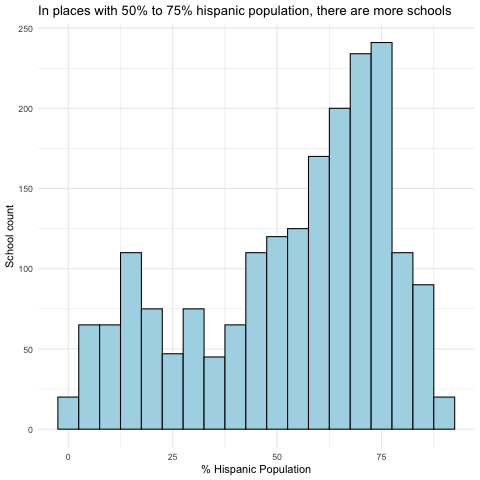

In [23]:
%%R -i data

data <- data %>%
  filter(Language == "Spanish") 

# create histogram with pct_hispanic_population

ggplot(data, aes(x = percent_hispanic_estimate)) +
    geom_histogram(binwidth = 5, fill = "lightblue", color = "black") +
    labs(title = "In places with 50% to 75% hispanic population, there are more schools", x = "% Hispanic Population", y = "School count") +
    theme_minimal()

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 35 rows containing non-finite values (`stat_bin()`). 



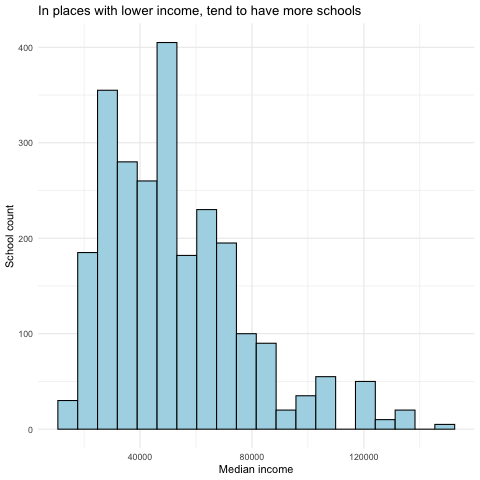

In [24]:
%%R -i data

# create histogram with median_income_estimate



ggplot(data, aes(x = median_income_estimate)) +
    geom_histogram(bins = 20, fill = "lightblue", color = "black") +
    labs(title = "In places with lower income, tend to have more schools", x = "Median income", y = "School count") +
    theme_minimal()

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 35 rows containing missing values (`geom_point()`). 



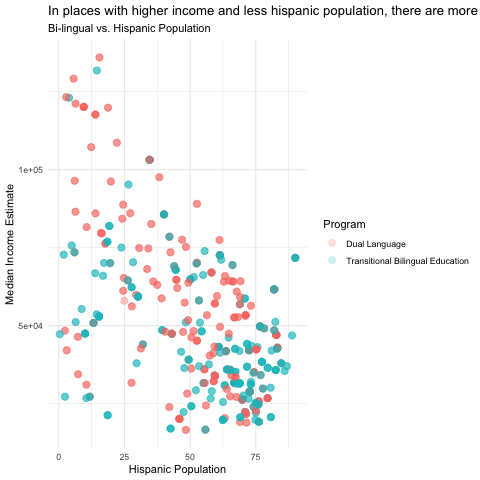

In [25]:
%%R 

# Filter for schools with programs in Spanish language only
spanish_programs_data <- data %>%
  filter(Language == "Spanish")  

# Create the scatter plot
ggplot(spanish_programs_data, aes(x = percent_hispanic_estimate, y = median_income_estimate, color = Program)) +
  geom_point(alpha = 0.2, size =3) +  # Plot points  
  labs(title = "In places with higher income and less hispanic population, there are more dual language programs",
       subtitle = "Bi-lingual vs. Hispanic Population",
       x = "Hispanic Population",
       y = "Median Income Estimate",
       color = "Program") +
  theme_minimal() # Use a minimal theme for a clean look
  


In [26]:
data.rename(columns={'% Hispanic': 'pctHistStudents'}, inplace=True)
data['pctHistStudents'] = data['pctHistStudents'] *100

In [27]:
data.Year

0       2016-17
1       2017-18
2       2018-19
3       2019-20
4       2020-21
         ...   
2537    2016-17
2538    2017-18
2539    2018-19
2540    2019-20
2541    2020-21
Name: Year, Length: 2542, dtype: object

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 3 rows containing missing values (`geom_point()`). 



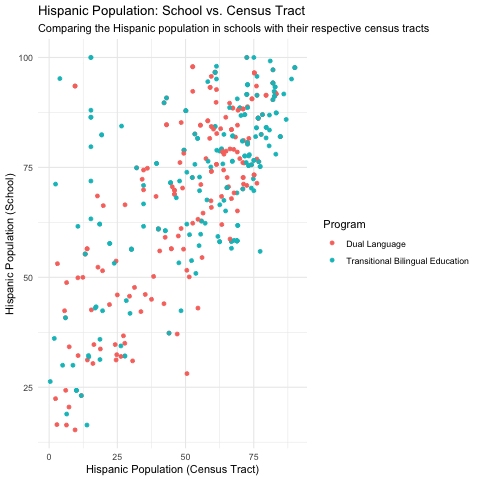

In [28]:
%%R -i data

# Filter for schools with programs in Spanish language only
data <- data %>%
  filter(Language == "Spanish") %>% 
   filter(Year == '2019-20')# Adjust based on your dataset's actual column for language

# Create the scatter plot for Hispanic population in school vs. census tract
ggplot(data, aes(x = percent_hispanic_estimate, y = pctHistStudents, color = Program)) +
  geom_point() +  # Plot points
  labs(title = "Hispanic Population: School vs. Census Tract",
       subtitle = "Comparing the Hispanic population in schools with their respective census tracts",
       x = "Hispanic Population (Census Tract)",
       y = "Hispanic Population (School)",
       color = "Program") +
  theme_minimal()  # Use a minimal theme for a clean look


#map on ggplot census with the lagitude and longitude for median_income_estimate, = Program